<a href="https://colab.research.google.com/github/markitosanches/machine/blob/master/RealState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("housepricedata.csv");

In [138]:
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [0]:
dataset = data.values

In [140]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [141]:
dataset.shape

(1460, 11)

In [0]:
# columns 1 - 10
X = dataset[:,0:10]

In [143]:
X.shape

(1460, 10)

In [144]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [0]:
y = dataset[:,10]

In [146]:
y.shape

(1460,)

In [147]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [0]:
#scaling 
from sklearn import preprocessing

In [0]:
#all values between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [150]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Train and test set (30%)
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [0]:
#validation test (50% of test set)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [154]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [0]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.train import AdamOptimizer
import tensorflow as tf



In [0]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(10,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

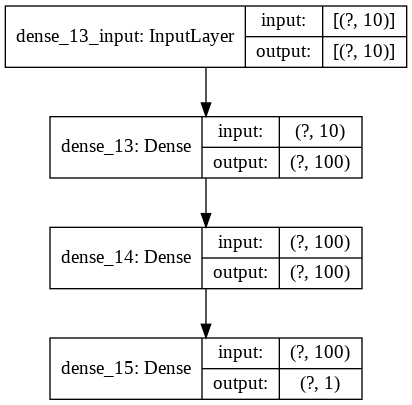

In [158]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

In [159]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


In [160]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 212us/sample - loss: 0.2290 - acc: 0.6204 - val_loss: 0.2005 - val_acc: 0.7945
Epoch 2/100
1022/1022 [==============================] - 0s 82us/sample - loss: 0.1725 - acc: 0.8268 - val_loss: 0.1407 - val_acc: 0.8402
Epoch 3/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.1284 - acc: 0.8513 - val_loss: 0.1231 - val_acc: 0.8493
Epoch 4/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.1135 - acc: 0.8581 - val_loss: 0.1154 - val_acc: 0.8630
Epoch 5/100
1022/1022 [==============================] - 0s 73us/sample - loss: 0.1041 - acc: 0.8611 - val_loss: 0.1108 - val_acc: 0.8356
Epoch 6/100
1022/1022 [==============================] - 0s 70us/sample - loss: 0.1001 - acc: 0.8699 - val_loss: 0.1059 - val_acc: 0.8584
Epoch 7/100
1022/1022 [==============================] - 0s 79us/sample - loss: 0.0943 - acc: 0.8738 - val_loss: 0.1038 - va

In [161]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 0s 46us/sample - loss: 0.0790 - acc: 0.8950


[0.07903616199244375, 0.89497715]

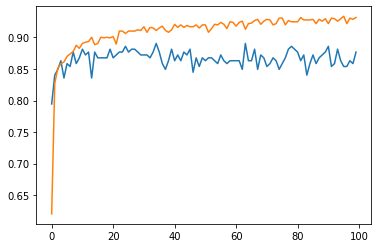

In [162]:
hist.history.keys()

import matplotlib.pyplot as plt
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['acc'])

In [163]:
#run prediction at local
prediction = model.predict(X_test[[8]])
prediction

array([[0.97085047]], dtype=float32)

In [0]:
GCP_PROJECT = 'INSERT HERE YOUR PROJECT ID'
KERAS_MODEL_BUCKET = 'gs://house-prediction-gcp'
REGION = 'us-central1'
KERAS_VERSION_NAME = 'v1'
MODEL = 'model_house'

In [0]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

In [167]:
# Create Bucket
! gsutil mb -p $GCP_PROJECT -l $REGION $KERAS_MODEL_BUCKET
# Display what is in the bucket
!gsutil ls -al $KERAS_MODEL_BUCKET

Creating gs://house-prediction-gcp/...


In [168]:
# Configure gcloud to use your project
!gcloud config set project $GCP_PROJECT

Updated property [core/project].


In [169]:
export_path = tf.contrib.saved_model.save_keras_model(model, KERAS_MODEL_BUCKET + '/keras_export')

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

In [171]:
# Create a new model in our project, you only need to run this once
!gcloud ai-platform models create $MODEL

Created ml engine model [projects/crack-glider-260700/models/model_house].


In [0]:
# Deploy the model to Cloud AI Platform

!gcloud beta ai-platform versions create $KERAS_VERSION_NAME --model $MODEL \
--origin=$KERAS_MODEL_BUCKET/keras_export/ \
--python-version=3.5 \
--runtime-version=1.14 \
--framework='TENSORFLOW'

In [173]:
X_test[[8]]

array([[0.03430788, 0.66666667, 0.5       , 0.14729951, 0.66666667,
        0.5       , 0.375     , 0.41666667, 0.33333333, 0.45416079]])

In [174]:
#json file
%%writefile predictions.json
[0.03430788, 0.66666667, 0.5, 0.14729951, 0.66666667, 0.5, 0.375, 0.41666667, 0.33333333, 0.45416079]

Overwriting predictions.json


In [175]:
# Test the deployed model on an example from our test set
# The correct score for this prediction is 7
prediction = !gcloud ai-platform predict --model=$MODEL --json-instances=predictions.json --version=$KERAS_VERSION_NAME
print(prediction[1])

[0.9708504676818848]
